In [59]:
import os
from IPython.display import display, clear_output
from pathlib import Path
import pymol2
import chempy # from pymol installation
from pathlib import Path
from typing import List, Set, Dict, Tuple, Callable
import json
from rdkit.Chem import AllChem, Draw

target_name = 'A71EV2A'
root = Path(f'{target_name}')

from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.MolStandardize.rdMolStandardize import LargestFragmentChooser
import pandas as pd
import ipywidgets as wd


import pymol2, re

Y89_distances: List[float] = []
C110_distances: List[float] = []
C110_angle: List[float] = []

with pymol2.PyMOL() as pymol:
    pymol.cmd.load("solvated_template.pdb", 'prot')
    pymol.cmd.load_traj('trajectory2.dcd', 'prot', state=1)
    pymol.cmd.alter('prot and polymer', 'resv+=6')
    pymol.cmd.sort()
    clear_output()
    #pymol.cmd.split_states('prot')
    #pymol.cmd.delete('prot')
    #names = pymol.cmd.get_names('objects')
    #for n in names:
    for i in range(1, 1+pymol.cmd.count_states('prot')):
        #p = f' and %{n}'
        #p = f'and state {i}'
        # Y89.OH-S125.O_distance
        d = pymol.cmd.get_distance(f'resi 89 and chain A and name OH', f'resi 125 and chain A and name O', state=i)
        Y89_distances.append( d )
        # cys hie
        d = pymol.cmd.distance(f'resi 21 and chain A and name NE2', f'resi 110 and chain A and name SG', state=i)
        C110_distances.append( d )
        a = pymol.cmd.angle('foo', f'resi 21 and chain A and name CE1', f'resi 21 and chain A and name NE2', f'resi 110 and chain A and name SG', state=i)
        C110_angle.append( a )

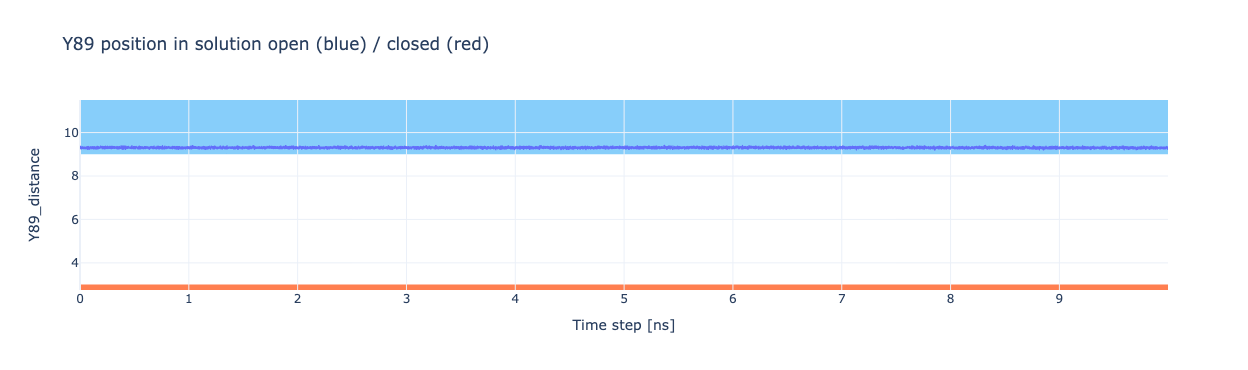

In [60]:
import pandas as pd
import plotly.express as px

data = pd.DataFrame(dict(Y89_distance=Y89_distances, C110_distance=C110_distances, C110_angle=C110_angle))
data.index = data.index.to_series() * 2e-3
data.index.name = 'Time step [ns]'


fig = px.line(data, y='Y89_distance',
              title='Y89 position in solution open (blue) / closed (red)',
              template='plotly_white'
             )
fig.add_shape(
        type='rect',
        x0=data.index[0],
        y0=2.75,
        x1=data.index[-1],
        y1=3,
        line=dict(width=0),
        fillcolor="coral",
    layer='below'
)
fig.add_shape(
        type='rect',
        x0=data.index[0],
        y0=9,
        x1=data.index[-1],
        y1=11.5,
        line=dict(width=0),
        fillcolor="LightSkyBlue",
        layer='below'
)
fig

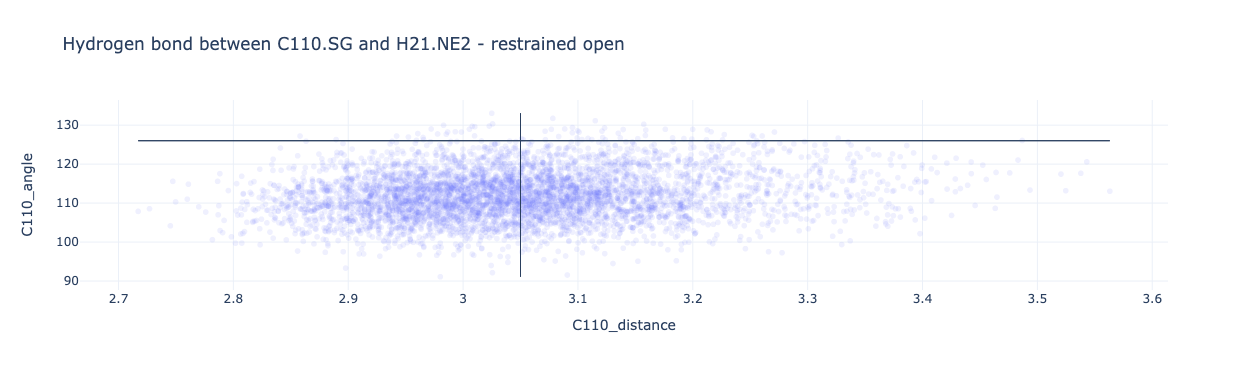

In [62]:
fig = px.scatter(data, x='C110_distance', y='C110_angle',
                 title='Hydrogen bond between C110.SG and H21.NE2 - restrained open',
                 opacity=0.1, template='plotly_white')
fig.add_shape(
        type='rect',
        x0=data.C110_distance.min(),
        y0=126,
        x1=data.C110_distance.max(),
        y1=126,
        line=dict(width=1),
)
fig.add_shape(
        type='rect',
        x0=3.05,
        y0=data.C110_angle.min(),
        x1=3.05,
        y1=data.C110_angle.max(),
        line=dict(width=1),
)

fig